<a href="https://colab.research.google.com/github/Deepa-Tilwani/AI-Summer-Camp-for-High-Schools/blob/main/Neural_Networks_with_Python_2024_Summer_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 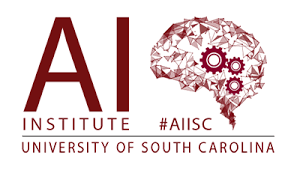


 ### AIISC Summer School 2024


### **Introduction to Neural Networks**

Neural networks are sophisticated computational models that play a pivotal role in the field of artificial intelligence. Inspired by the structure and function of the human brain, these networks are essentially a collection of algorithms designed to recognize patterns. Just as neurons in our brain connect in complex patterns to process information, artificial neural networks (ANNs) use layers of artificial neurons—or nodes—to perform intricate computations.

At their core, neural networks are about making sense of input data by passing it through layers of these interconnected nodes. Each node in a network acts like a mini-decision maker, working in harmony to analyze and interpret data, from numbers and images to sound and text.

#### **Where They're Used**
The versatility of neural networks allows them to be applied in numerous fields, showcasing their broad relevance. Here are a few notable applications:
- **Image Recognition**: Neural networks excel in identifying and classifying objects within images, making them invaluable in areas like medical imaging, security surveillance, and autonomous vehicles.
- **Speech Recognition**: These networks transform spoken language into text, underpinning technologies used in voice-activated assistants, real-time translation apps, and accessibility tools for those with speech impairments.
- **Recommendation Systems**: By analyzing patterns in user behavior, neural networks power the recommendation engines behind platforms like Netflix and Amazon, suggesting movies, products, and even new friends on social networks based on user preferences and past activities.

These examples just scratch the surface of how neural networks are integrated into everyday technologies, enhancing capabilities and improving user experiences across various domains. Through their ability to learn and adapt, neural networks continue to push the boundaries of what machines can do, driving innovation across the digital landscape.

# Basic Concepts of Neural Networks

**Neurons:**

In the human brain, a neuron is a cell that processes and transmits information through electrical and chemical signals. It consists of a cell body, dendrites that receive signals, and an axon that sends signals out to other neurons. An artificial neuron in a neural network works similarly but in a simplified manner. It receives input, processes it through a mathematical function, and outputs the result.

Here's a basic example of how a single neuron works in Python:

# Layers

Neural networks are structured into layers, each consisting of a number of neurons:

**Input Layer**: This is the entry point of the data into the network. The number of neurons in this layer typically matches the number of features in the input dataset.

**Hidden Layers**: These layers are between the input and output layers and can be one or multiple. They perform the majority of the computation through their neurons.

**Output Layer**: The final layer that produces the output of the network. The design of this layer depends on the type of prediction or classification required by the network.

Here’s how you might represent a simple network with these layers in Python:

**Forward Propagation**

Forward propagation is the process by which neural networks make predictions. Inputs are fed into the neural network, passing through the layers of neurons starting from the input layer, moving through the hidden layers, and finally reaching the output layer. Each neuron in a layer receives inputs from the previous layer, multiplies these inputs by its weights, adds a bias, and passes the result through an activation function to produce its output. This output then becomes the input for the next layer. The process continues until the output layer produces the final prediction.

**Weights and Biases**

Each connection between two neurons has a weight that adjusts as the network learns, determining the strength of one neuron's influence on another. Biases are additional parameters which allow the model to fit better with the data by shifting the activation function to the left or right, which can be critical for learning complex patterns.

Weights and biases are typically initialized randomly and are then adjusted through a process known as backpropagation, which we'll explore later in the training

**Backpropagation**

Backpropagation is the heart of the neural network training process. It is how the network learns by adjusting its weights and biases. After computing the loss, backpropagation works by calculating the gradient (the derivative) of the loss function with respect to each weight and bias in the network, which indicates how the loss would change if the weights and biases are increased or decreased. These gradients are then used to update the weights and biases, typically moving them in the direction that minimizes the loss.

**Loss Functions**

A loss function measures how well the neural network’s predictions match the expected outcomes. It quantifies the error between the predicted values and the true values and this error is used during training to refine the model’s weights and biases.

    Mean Squared Error (MSE): Used for regression tasks.
    Cross-Entropy Loss: Often used in classification tasks.

In practice, you don't need to implement backpropagation manually for most projects, as modern deep learning libraries like TensorFlow and PyTorch handle these computations automatically.

# A simple 3-layer feedforward neural network from scratch to solve a multi-classification problem

In [ ]:
# Package imports
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from itertools import chain

# Creating the Dataset

For supervised machine learning, we need a dataset. The foundation of any machine learning project is its training dataset, and having access to high-quality data is crucial. The scikit-learn library offers several convenient dataset generators and loaders. For this tutorial, we'll use the make_classification module from scikit-learn to generate a two-dimensional, multi-class toy dataset to work with.

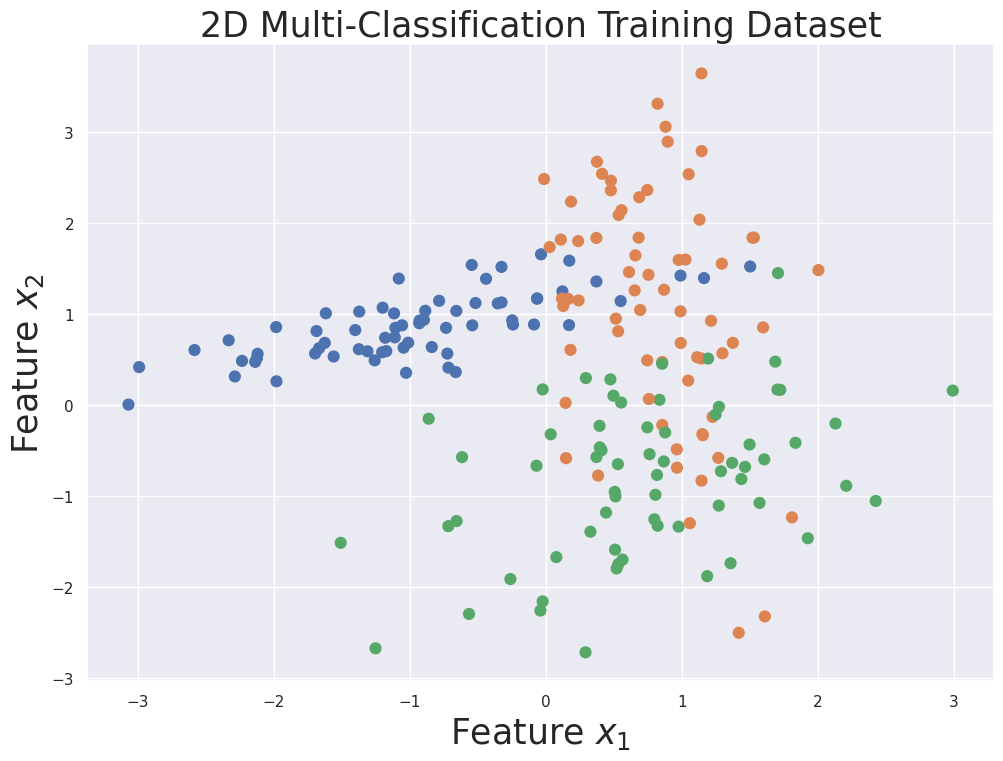

In [ ]:


X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1,
                           weights=None, flip_y=0.01, class_sep=0.85, hypercube=True, shift=0.0,
                           scale=1.0, shuffle=True, random_state=0)

# Split the dataset into training and validation segments
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1234)


# Define our color palette
palette = sns.color_palette('deep', 3)
colormap = ListedColormap(palette) # colormap follows the BGR palette
# Plot training dataset
plt.rcParams['figure.figsize']=(11.7, 8.27)
fontsize = 25
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=colormap)
plt.xlabel('Feature $x_1$', fontsize=fontsize)
plt.ylabel('Feature $x_2$', fontsize=fontsize)
plt.title('2D Multi-Classification Training Dataset', fontsize=fontsize)
plt.show()



The dataset we've created contains three classes, depicted as circles in blue, green, and red. In the program, these classes are indexed starting from zero. Specifically, class 0 is represented by blue circles, class 1 by green circles, and class 2 by red circles. These colors can be thought of as different categories in a real-world context, like various species of animals, with the x- and y-coordinates representing measurable characteristics of each species.

Our dataset is limited to 2D for simplicity and ease of visualization. In contrast, real-world datasets might contain hundreds or thousands of features across numerous categories, complicating the task of learning from data. This highlights the necessity of employing the scientific method and robust experimental design to develop reliable models that yield meaningful outcomes.

Furthermore, we have divided the dataset into training and validation segments, following standard practice in machine learning experimentation. The model is trained and fine-tuned using the training segment and then evaluated on the validation set using certain performance metrics, a process commonly referred to as cross-validation.

We will set up a basic ANN using TensorFlow's Keras API, which is a high-level interface for building and training deep learning models. Here's a detailed breakdown suitable for newcomers:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


 **TensorFlow**: This is one of the most widely used libraries for machine learning and deep learning. It offers both high-level and low-level APIs for model building, training, and inference.

 **Sequential**: This is a module from Keras that is used to initialize a linear stack of layers which is one of the simplest types of neural network architectures.

**Dense**: This refers to a densely connected neural network layer, which is also known as a fully connected layer. Each neuron in a dense layer receives input from all neurons of the previous layer, effectively learning patterns from the entire input space.

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features and hidden layer with 10 nodes
    Dense(10, activation='relu'),                    # Another hidden layer with 10 nodes
    Dense(3, activation='softmax')                   # Output layer with 3 nodes (one for each class)
])


**Sequential Model Initialization**: The Sequential model is a linear stack of layers. It's created by passing a list of layer instances, which in this case, include two hidden layers and one output layer.

**First Dense Layer**: This layer is both your input and first hidden layer. It has 10 neurons (or units). The input_shape argument indicates the shape of the input data which, in this case, has 2 features per sample. The relu (rectified linear unit) activation function is used, which allows the model to learn non-linear relationships in the data.

**Second Dense Layer**: This is another hidden layer with 10 neurons, using the relu activation function. There's no need to specify input_shape here because Keras automatically infers the shape from the output of the previous layer.

**Output Dense Layer**: This is the output layer with 3 neurons, one for each class in the dataset. The softmax activation function is used here, which is standard for multi-class classification problems. It outputs probabilities of the input being in each class, which sum to 1.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Optimizer**: The adam optimizer is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
\
**Loss Function**: sparse_categorical_crossentropy is used as the loss function for multi-class classification problems where the labels are provided as integers. It measures the disparity between the predicted probability distribution and the true distribution (the true class is represented as 1 in the probability distribution).

**Metrics**: The model's performance is evaluated based on accuracy, which is the fraction of the predictions our model got right.

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finally, let's train the model on the training data and evaluate it on the validation data

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))




Epoch 1/100
5/5 [==============================] - 5s 394ms/step - loss: 1.0903 - accuracy: 0.3806 - val_loss: 1.0978 - val_accuracy: 0.4697
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 1.0703 - accuracy: 0.4478 - val_loss: 1.0818 - val_accuracy: 0.4848
Epoch 3/100
5/5 [==============================] - 0s 47ms/step - loss: 1.0511 - accuracy: 0.4851 - val_loss: 1.0666 - val_accuracy: 0.5152
Epoch 4/100
5/5 [==============================] - 0s 78ms/step - loss: 1.0325 - accuracy: 0.5075 - val_loss: 1.0514 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 0s 92ms/step - loss: 1.0145 - accuracy: 0.5149 - val_loss: 1.0373 - val_accuracy: 0.5152
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 0.9959 - accuracy: 0.5224 - val_loss: 1.0239 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 57ms/step - loss: 0.9796 - accuracy: 0.5299 - val_loss: 1.0111 - val_accuracy: 0.5000
Epoch 8/100
5/5 [==

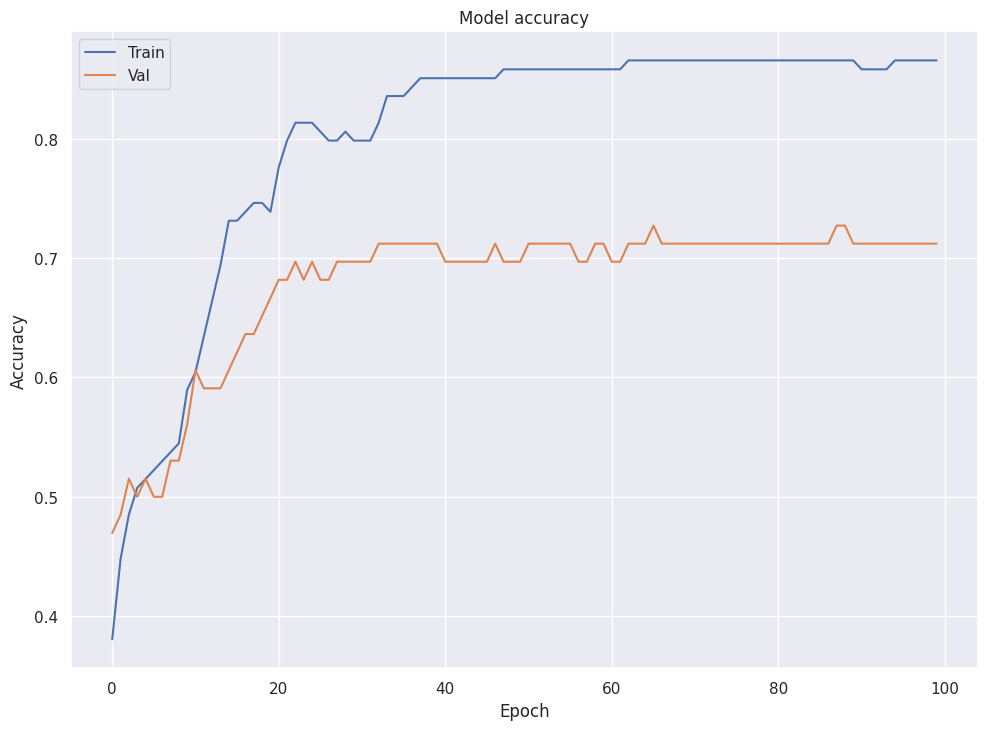

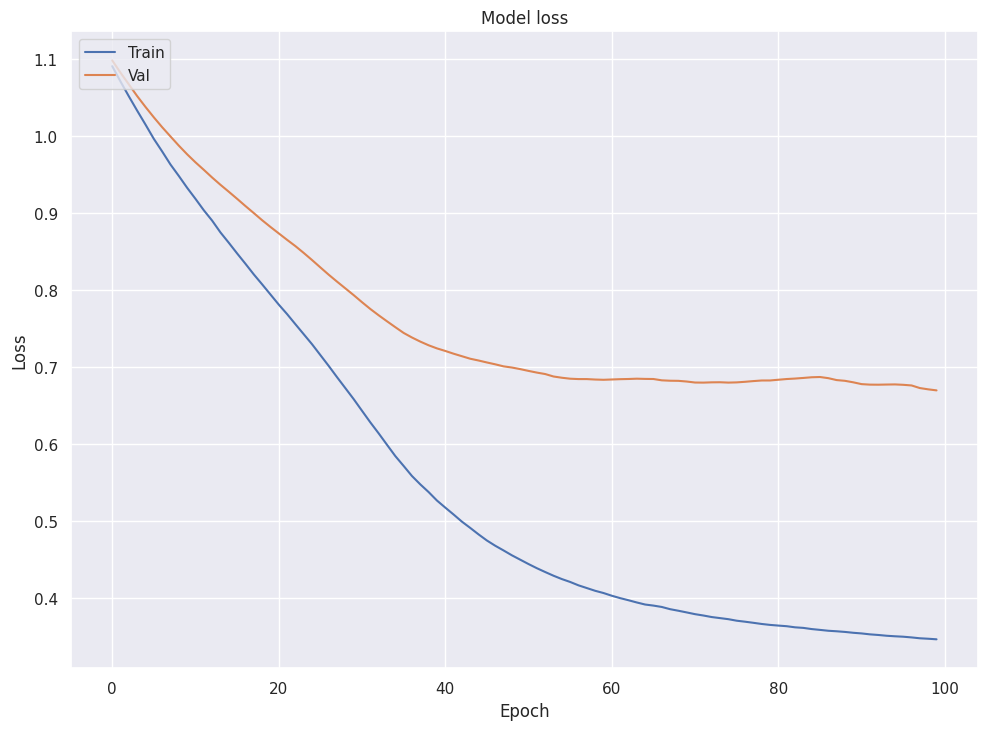

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### YAY! You created your first Neural Network 😉

# HW Excercise: Classify Points Relative to a Line
Problem Statement

Create an artificial neural network that can classify points in a 2-dimensional space as either above or below the line y = x. You will generate a synthetic dataset for this task, build a simple neural network model, train it, and then evaluate its performance.
Task Details

    Generate Data: Create a set of random points in 2D space and label them based on their position relative to the line y = x.
    Build the Model: Construct a simple ANN with at least one hidden layer.
    Train the Model: Use the generated dataset to train your model.
    Evaluate: Predict the class of new points and visualize the results.